# 1. Знакомство с данными, изучение общей информации

В рамках данного проекта мы рассмотрим данные предоставленные сотовым оператом «Мегалайна». В выборку для анализа попали данные по 500 пользователям за 2018 год. В результате анализа данных предстоит определить на основании поведения клиентов какой тариф лучше.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [67]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [68]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [69]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


До перехода к анализу данных необходимо изменить тип данных в столбцах: "call_date", "id", "duration". Длительность звонков округлить вверх, по условиям оператора связи

In [70]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [71]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В данной таблице необходимо изменить тип данных в столбцах: "id", "session_date"

In [72]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [73]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В данной таблице необходимо изменить тип данных в столбцах: "id", "message_date"

In [74]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [75]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица не содержит ошибок

In [76]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [77]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В данной таблице необходимо изменить тип данных в столбцах: "churn_date", "reg_date". Так же изходя из описательной части проекта видим, что 38 пользователей прекратили использование тарифа

# 2. Подготовка данных

Округлим длительность звонков вверх

In [78]:
calls['duration'] = np.ceil(calls['duration'])

Приведем данные в таблицах к нужным типам

In [79]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['id'] = calls['id'].astype('int')
calls['duration'] = calls['duration'].astype('int')

messages['id'] = messages['id'].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

internet['id'] = internet['id'].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")


Других ошибок в данных не выявлено

Расчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [80]:
calls['month'] = calls['call_date'].dt.month
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'calls_duration','id':'calls_total'})
user_calls.head(15)

,user_id,month,calls_duration,calls_total
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
5,1000,10,350,57
6,1000,11,338,43
7,1000,12,333,46
8,1001,11,430,59
9,1001,12,414,63


Расчитаем количество отправленных сообщений по месяцам

In [81]:
messages['month'] = messages['message_date'].dt.month
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total'})
user_messages.head(15)

,user_id,month,sms_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Расчитаем объем израсходованного интернет-трафика по месяцам

In [82]:
internet['month'] = internet['session_date'].dt.month
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total'})
user_internet.head(15)

,user_id,month,mb_total
0,1000,5,"2,253.49"
1,1000,6,"23,233.77"
2,1000,7,"14,003.64"
3,1000,8,"14,055.93"
4,1000,9,"14,568.91"
5,1000,10,"14,702.49"
6,1000,11,"14,756.47"
7,1000,12,"9,817.61"
8,1001,11,"18,429.34"
9,1001,12,"14,036.66"


Расчитаем месячную выручку по пользователям

In [83]:
data = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
data = data.merge(user_internet, on=['user_id','month'], how = 'outer')
data = data.merge(users, on='user_id', how='left')
data = data.merge(tariffs, left_on = 'tariff', right_on = 'tariff_name', how='left')
data.head(15)

,user_id,month,calls_duration,calls_total,sms_total,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.00,58.00,57.00,"14,568.91",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
5,1000,10,350.00,57.00,73.00,"14,702.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
6,1000,11,338.00,43.00,58.00,"14,756.47",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
7,1000,12,333.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
8,1001,11,430.00,59.00,NaN,"18,429.34",41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,smart
9,1001,12,414.00,63.00,NaN,"14,036.66",41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,smart


In [84]:
data.isna().sum()

user_id                     0
month                       0
calls_duration             40
calls_total                40
sms_total                 497
mb_total                   11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

Скорее всего пропуски связаны с тем, что абонет не пользовался данным типом услуги, поэтому заменим их "0"

In [85]:
data['sms_total'] = data['sms_total'].fillna(0)
data['mb_total'] = data['mb_total'].fillna(0)
data['month_calls'] = data['calls_duration'].fillna(0)
data['calls_total'] = data['calls_total'].fillna(0)

Расчитаем выручку за месяц

In [86]:
def revenue(row):
    sms = (row['sms_total'] - row['messages_included']) * row['rub_per_message']
    mins = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_total'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [87]:
data['revenue'] = data.apply(lambda x: revenue(x), axis=1)
data['total_paid'] = data['rub_monthly_fee'] + data['revenue']
data.sort_values(by='total_paid').tail()

,user_id,month,calls_duration,calls_total,sms_total,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,month_calls,revenue,total_paid
1793,1286,12,739.00,95.00,68.00,"35,108.07",19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,smart,739.00,"4,771.00","5,321.00"
1622,1261,12,"1,074.00",141.00,22.00,"32,650.91",46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,smart,"1,074.00","5,122.00","5,672.00"
3105,1486,11,764.00,108.00,96.00,"36,266.11",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,smart,764.00,"5,130.00","5,680.00"
260,1042,12,728.00,121.00,75.00,"37,165.69",42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,smart,728.00,"5,159.00","5,709.00"
3106,1486,12,"1,007.00",133.00,83.00,"38,552.45",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,smart,"1,007.00","6,220.00","6,770.00"


# 3. Анализ данных

Проведем сравнение платежа абонента с абоненской платой по тарифу

In [88]:
data[['revenue', 'total_paid']].describe()

,revenue,total_paid
count,"3,214.00","3,214.00"
mean,550.02,"1,529.08"
std,767.77,798.25
min,0.00,550.00
25%,0.00,750.00
50%,163.50,"1,653.50"
75%,938.00,"1,950.00"
max,"6,220.00","6,770.00"


In [89]:
data['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

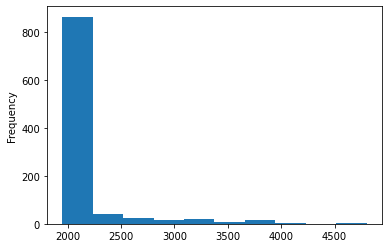

In [90]:
data[data['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10)
plt.show()

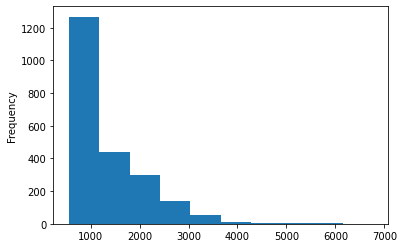

In [91]:
data[data['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10)
plt.show()

In [92]:
data.groupby('tariff').agg({'total_paid':['median','mean','var','std']}).style.format("{:.2f}")

Проанализировав данные можно сделать вывод, что абоненты использующие тариф "Ультра" чаще всего укладываютмя в абоненскую плату за месяц, тогда как абоненты использующие тариф "Смарт" часто превышают лимит установленный тарифом

Количество минут в месяц, используемых на разных тарифах

In [93]:
data.groupby('tariff').agg({'calls_duration':['median','mean','var','std']}).style.format("{:.2f}")

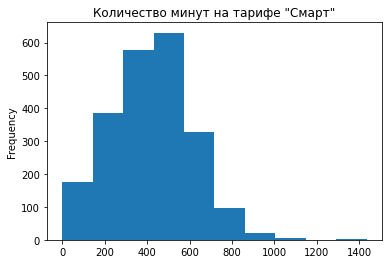

In [94]:
data[data['tariff'] == 'smart']['calls_duration'].plot(kind='hist', bins=10)
plt.title('Количество минут на тарифе "Смарт"')
plt.show()

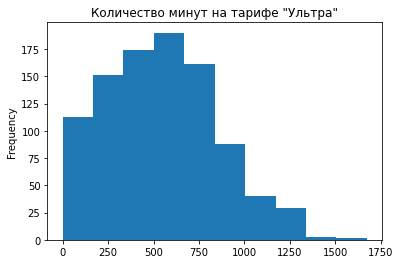

In [95]:
data[data['tariff'] == 'ultra']['calls_duration'].plot(kind='hist', bins=10)
plt.title('Количество минут на тарифе "Ультра"')
plt.show()

По результатм анлиза данных можно сделать вывод: абоненты тарифа "Смарт" укладываются в колличесво минут в рамках абоненской платы, тогда как у пользователей тарифа "Ультра" остается большое количество не израсходованных минут предусмотренных абоненской платой. Судя по среднему значению, количество использованных минут не значительно отличается в зависимости от используемого тарифного плана

Интернет трафик в месяц, используемый на разных тарифах

In [96]:
data.groupby('tariff').agg({'mb_total':['median','mean','var','std']}).style.format("{:.2f}")

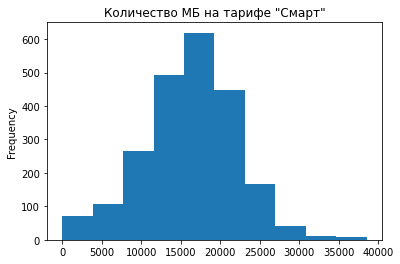

In [97]:
data[data['tariff'] == 'smart']['mb_total'].plot(kind='hist', bins=10)
plt.title('Количество МБ на тарифе "Смарт"')
plt.show()

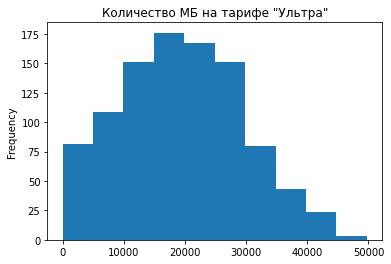

In [98]:
data[data['tariff'] == 'ultra']['mb_total'].plot(kind='hist', bins=10)
plt.title('Количество МБ на тарифе "Ультра"')
plt.show()

По результатм анлиза данных можно сделать вывод: пользователи на тарифе "Смарт" часто превышают количество МБ предусмотренных тарифным планом, тогда как у атонентов на тарифе "Ультра" остается большой запас не израсходованного интернет трафика. Используеме количество МБ ха месяц у пользователей разных тарифов так де отличается не существенно, что мы видим при анализе средней

Количество СМС в месяц, используемый на разных тарифах

In [99]:
data.groupby('tariff').agg({'sms_total':['median','mean','var','std']}).style.format("{:.2f}")

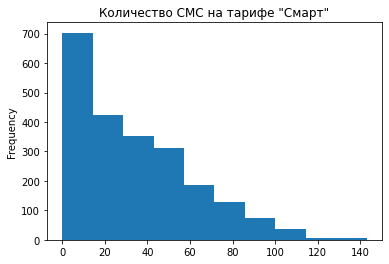

In [100]:
data[data['tariff'] == 'smart']['sms_total'].plot(kind='hist', bins=10)
plt.title('Количество СМС на тарифе "Смарт"')
plt.show()

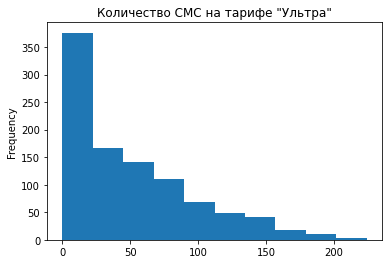

In [101]:
data[data['tariff'] == 'ultra']['sms_total'].plot(kind='hist', bins=10)
plt.title('Количество СМС на тарифе "Ультра"')
plt.show()

Так же как и в предыдущих пунктах наблюдаем незнаичтельную разницу по количеству отправляемых СМС между абонентами использующих разные тарифы. Так же можно отметить, что использование количества СМС значительно ниже, чем включено в размер абоненской платы по тарифам, видимо это связано с общим снижением использования СМС, при развитии новых мессенжеров таких как "Viber", "WhatsApp", "Telegram"

# 4. Проверка гипотиз

Удалим выбросы

In [102]:
def delete_outliers(data, column, graphic=0, x = 10, y = 10):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return data.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return data.loc[iqr_test]

Сравниваемые выборки являются независимыми между собой, поэтому для использования возьмем t-критерий Стьюдента.

Опираясь на теорию данного курса:
1. Нулевая гипотиза всегда формулируется так, чтобы использовать знак равенства.
2. Общепринятые пороговые значения — 5% и 1%. Для данной работы берем 5%.

Проверка первой гипотизы
H0 Средняя выручка абонентов тарифов "Смарт" и "Ультра" равна
H1 Средняя выручка абонентов тарифов "Смарт" и "Ультра" не равна

In [103]:
ultra = data[data['tariff'] == 'ultra']
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

smart = data[data['tariff'] == 'smart']
smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']
alpha = 0.05
results = st.ttest_ind(ultra, smart)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 6.199325734910118e-155
Отвергаем нулевую гипотезу


Проверка второй гипотизы
H0 Средняя выручка абонентов из Москвы равна средней выручке пользователей из других регионов
H1 Средняя выручка абонентов из Москвы  не равна средней выручке пользователей из других регионов

In [104]:
data['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [105]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Регионы')

moscow = data[data['region'] == 'Москва']
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

region = data[data['region'] == 'Регионы']
region = delete_outliers(region, 'total_paid', 0)
region = region['total_paid']
alpha = 0.05
results = st.ttest_ind(moscow, region)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.29404256281786195
Не получилось отвергнуть нулевую гипотезу


# 5. Общий вывод

На основании проведенного исследования можно сделать следующие выводы:
1. Средняя выручка между абонентами тарифов "Смарт" и "Ультра" значительно различается. Думаю это предлолагалось изначально при разработке данных тарифов, т.к. они были расчитаны на разные категории пользователей.
2. Средняя выручка между абонентами из Москвы и других регионов отличается незначительно, скорее всего это связано со стандартным набором услуг мобильной связи
3. На основании проведенного анализа выручки, для сотового оператора выгодныее тариф "Смарт". Не смотря на то, что для тарифа "Ультра" установлена более высокая абоненская плата, пользователи укладываются в данную сумму в течении месяца. Тогда как пользователи тарифного плана "Смарт" регулярно оплачивают услуги сверх абоненской плтаты, что влечет к расту выручки поставщика услуг